**Loading Libraries**

In [ ]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import time


In [ ]:
print(f"Last updated: {time.asctime()}")

Last updated: Fri Oct 25 16:18:37 2024


**Uploading File**

In [ ]:
df = pd.read_csv("heart dataset.csv")
df.shape

(303, 14)

**Exploring Data**

In [ ]:
df.head()

In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


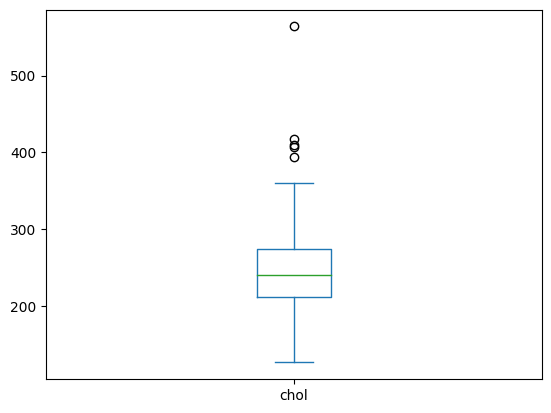

In [ ]:
df['chol'].plot(kind='box')
plt.show()

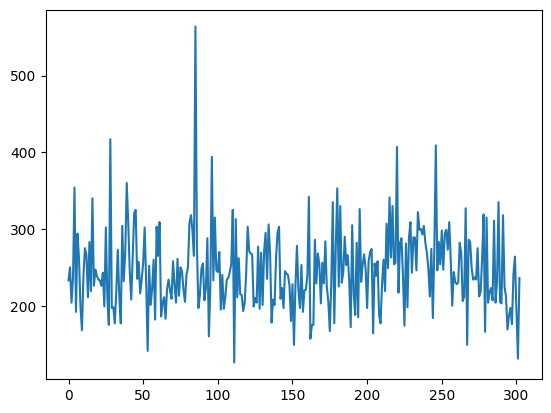

In [ ]:
df['chol'].plot(kind='box')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (303, 14)
DataFrame shape after removing outliers: (298, 14)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8351648351648352
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

[[33  8]
 [ 7 43]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)  # Start with k=5 (can be tuned)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8681318681318682
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)  # Start with k=5 (can be tuned)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8681318681318682
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

Confusion Matrix:
 [[35  6]
 [ 6 44]]


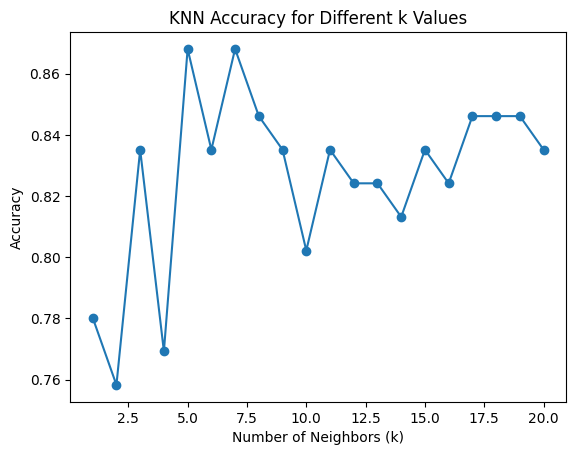

In [ ]:

accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the models dictionary, adding KNN and Logistic Regression
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Define the fit_and_score function as before
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and store its score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Calculate and print the model scores
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores


{'Logistic Regression': 0.8131868131868132,
 'K-Nearest Neighbors': 0.8681318681318682,
 'Random Forest': 0.8351648351648352}

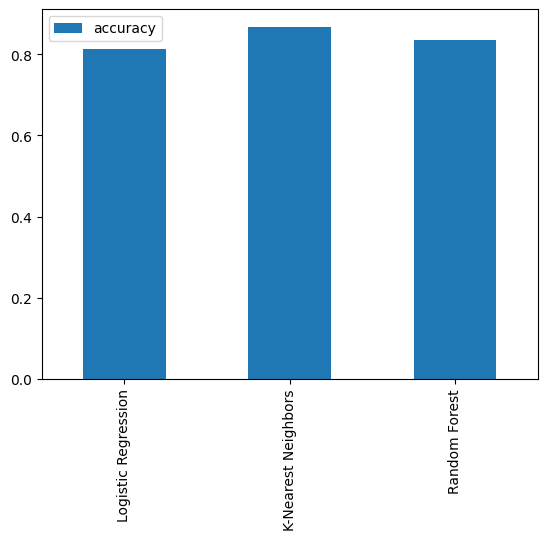

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


# Function to fit models and calculate precision, recall, and F1-score
def evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models with precision, recall, and F1-score.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Dictionary to store the results
    model_metrics = {}

    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate metrics
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        # Store the metrics
        model_metrics[name] = {
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1
        }

        # Print classification report for each model
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test, y_pred), "\n")

    return model_metrics

# Evaluate models and display the results
model_metrics = evaluate_models(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_metrics


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91
 

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91
 

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0

{'Logistic Regression': {'Precision': 0.8129282482223658,
  'Recall': 0.8131868131868132,
  'F1-score': 0.8129584631234796},
 'K-Nearest Neighbors': {'Precision': 0.8681318681318682,
  'Recall': 0.8681318681318682,
  'F1-score': 0.8681318681318682},
 'Random Forest': {'Precision': 0.834965524671407,
  'Recall': 0.8351648351648352,
  'F1-score': 0.8349633498148349}}

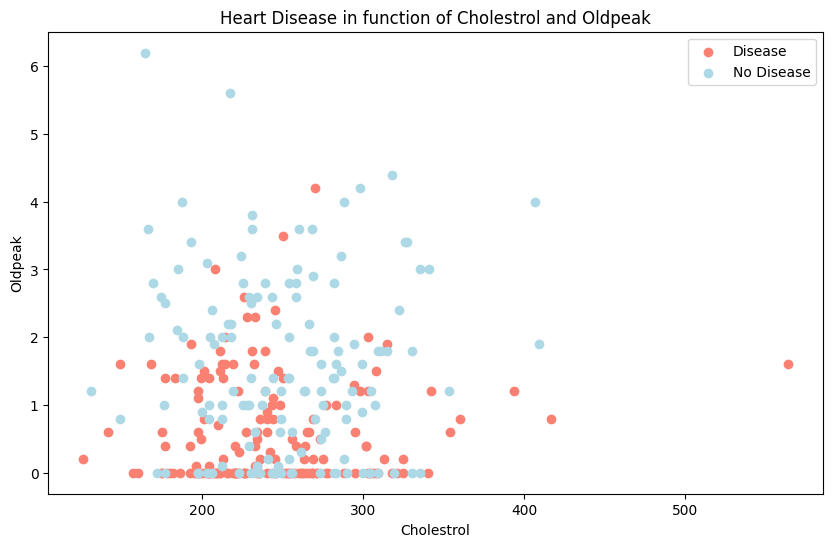

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.chol[df.target==1],
            df.oldpeak[df.target==1],
            c="salmon")

plt.scatter(df.chol[df.target==0],
            df.oldpeak[df.target==0],
            c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Cholestrol and Oldpeak")
plt.xlabel("Cholestrol")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Oldpeak");